In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Q9. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.
# METADATA
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the
# dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements 
# included in the dataset.
# The data 
# The dataset consists of 9 columns namely - 
# 1. pregnant - Number of times pregnant
# 2. glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. bp - Diastolic blood pressure (mm Hg)
# 4. skin - Triceps skin fold thickness (mm)
# 5. insulin - 2-Hour serum insulin (mu U/ml)
# 6. bmi - Body mass index (weight in kg/(height in m)^2)
# 7. pedigree - Diabetes pedigree function
# 8. age - Age in years
# 9. outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
df = pd.read_csv('diabetes_csv.csv')
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [4]:
# Q10. Compute mean & standard deviation ,tabulate and visualize the age of the patients.
print("Mean age is: ",df['age'].mean())
print("Standard deviation is: ",df['age'].std())

Mean age is:  33.240885416666664
Standard deviation is:  11.76023154067868


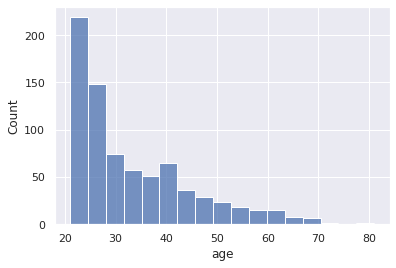

In [6]:
sns.histplot(data=df, x="age")

In [7]:
df['outcome']=df['outcome'].replace(['tested_positive'],1)
df['outcome']=df['outcome'].replace(['tested_negative'],0)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# Q11. Analyze and tabulate the relationship of age,BMI of patients with respect to the class.
ct = df[['age','bmi','outcome']]
print(ct.corr())
print("Age and bmi have a negligible correlation, whereas (age and outcome) and (bmi and outcome) have a low positive correlation")

              age       bmi   outcome
age      1.000000  0.036242  0.238356
bmi      0.036242  1.000000  0.292695
outcome  0.238356  0.292695  1.000000
Age and bmi have a negligible correlation, whereas (age and outcome) and (bmi and outcome) have a low positive correlation


In [9]:
# Q12. Tabulate the class label and comment on whether the classes are balanced


In [11]:
# Q13. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset
# into training and test set (70,30) using train_test_split method in sklearn. 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df[['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']]
y= df['outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state =500)

In [12]:
# Train
classifier = LogisticRegression(random_state =500, max_iter=1000 )
classifier.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000, random_state=500)

In [13]:
# Test
y_pred = classifier.predict(xtest)

Confusion Matrix : 
 [[138  15]
 [ 32  46]]


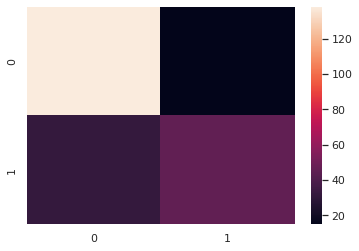

In [14]:
# Q14. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a
# heat map.
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
sns.heatmap(cm)

In [17]:
# Q15. Compute accuracy rate, true positive and true negative rate and comment on the performance.
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
# True positive: Sick people correctly identified as sick
# False positive: Healthy people incorrectly identified as sick
# True negative: Healthy people correctly identified as healthy
# False negative: Sick people incorrectly identified as healthy
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
# TP = 46
# TN = 138
# FN = 32
# FP = 15
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("True negative rate: ",TNR)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True positive rate: ",TPR)
print("High true negative rate, women who are not pregnant will not be diagnosed as not pregnant whereas the low true positive rate \nmeans that 58% of pregnant women will be diagnosed as not pregnant which is not ideal")

Accuracy :  0.7965367965367965
True negative rate:  0.9019607843137255
True positive rate:  0.5897435897435898
High true negative rate, women who are not pregnant will not be diagnosed as not pregnant whereas the low true positive rate 
means that 58% of pregnant women will be diagnosed as not pregnant which is not ideal


0.8611868484362469
The classifier has a very high AUC score which can be considered as an excellent analysis for the classification of diabetes 


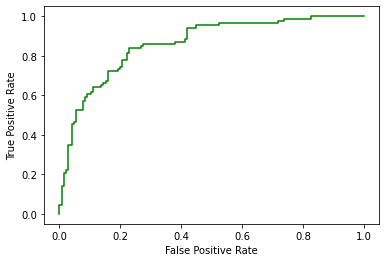

In [ ]:
pred_proba_y = LogReg.predict_proba(test_x)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_y,  pred_proba_y[::,1])
print(sklearn.metrics.roc_auc_score(test_y, pred_proba_y[::,1]))
print("The classifier has a very high AUC score which can be considered as an excellent analysis for the classification of diabetes ")
plt.plot(fpr,tpr, color = 'green')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()